<h1>Correlation Analysis</h1>

In [36]:
#Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 

#Get data
comm_data = pd.read_csv("Data/censusCrimeClean.csv")


<p class="p">We will be comparing median household income and its effect on violent crimes per population. First we will calculate the Pearson and Spearman rank correlations. These two give us an idea of the correlation between the two variables. There is also a p-value, which is a measure of how likely or probable it is that any observed correlation is due to chance. The smaller the p-value, the larger the likelihood the observed correlation is by chance and there is evidence against the null hypothesis. The opposite is true for large p-values.<br/><br/> The standard in hypothesis testing is to assume a 5% significance level, if the p-value is smaller than 5, this means there is evidence against the null hypothesis- that there is no correlation.</p>

In [14]:
#Calculate pearson rank of Median Income vs Violent Crimes per population
pr_medIncome_VC= stats.pearsonr(comm_data.medIncome,comm_data.ViolentCrimesPerPop)
pr_medIncome_VC

(-0.42422061672612743, 6.334424808041331e-88)

In [15]:
#Calculate pearson rank of Median Income vs Violent Crimes per population
sr_medIncome_VC = stats.spearmanr(comm_data.medIncome,comm_data.ViolentCrimesPerPop)
sr_medIncome_VC 

SpearmanrResult(correlation=-0.482169950997556, pvalue=1.2978853095169542e-116)

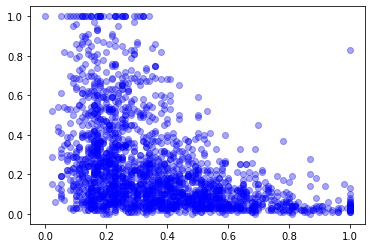

In [16]:
#Plot the two variables against each other.
plt.scatter(comm_data.medIncome,comm_data.ViolentCrimesPerPop,alpha=0.35, c='b')
plt
plt.show()

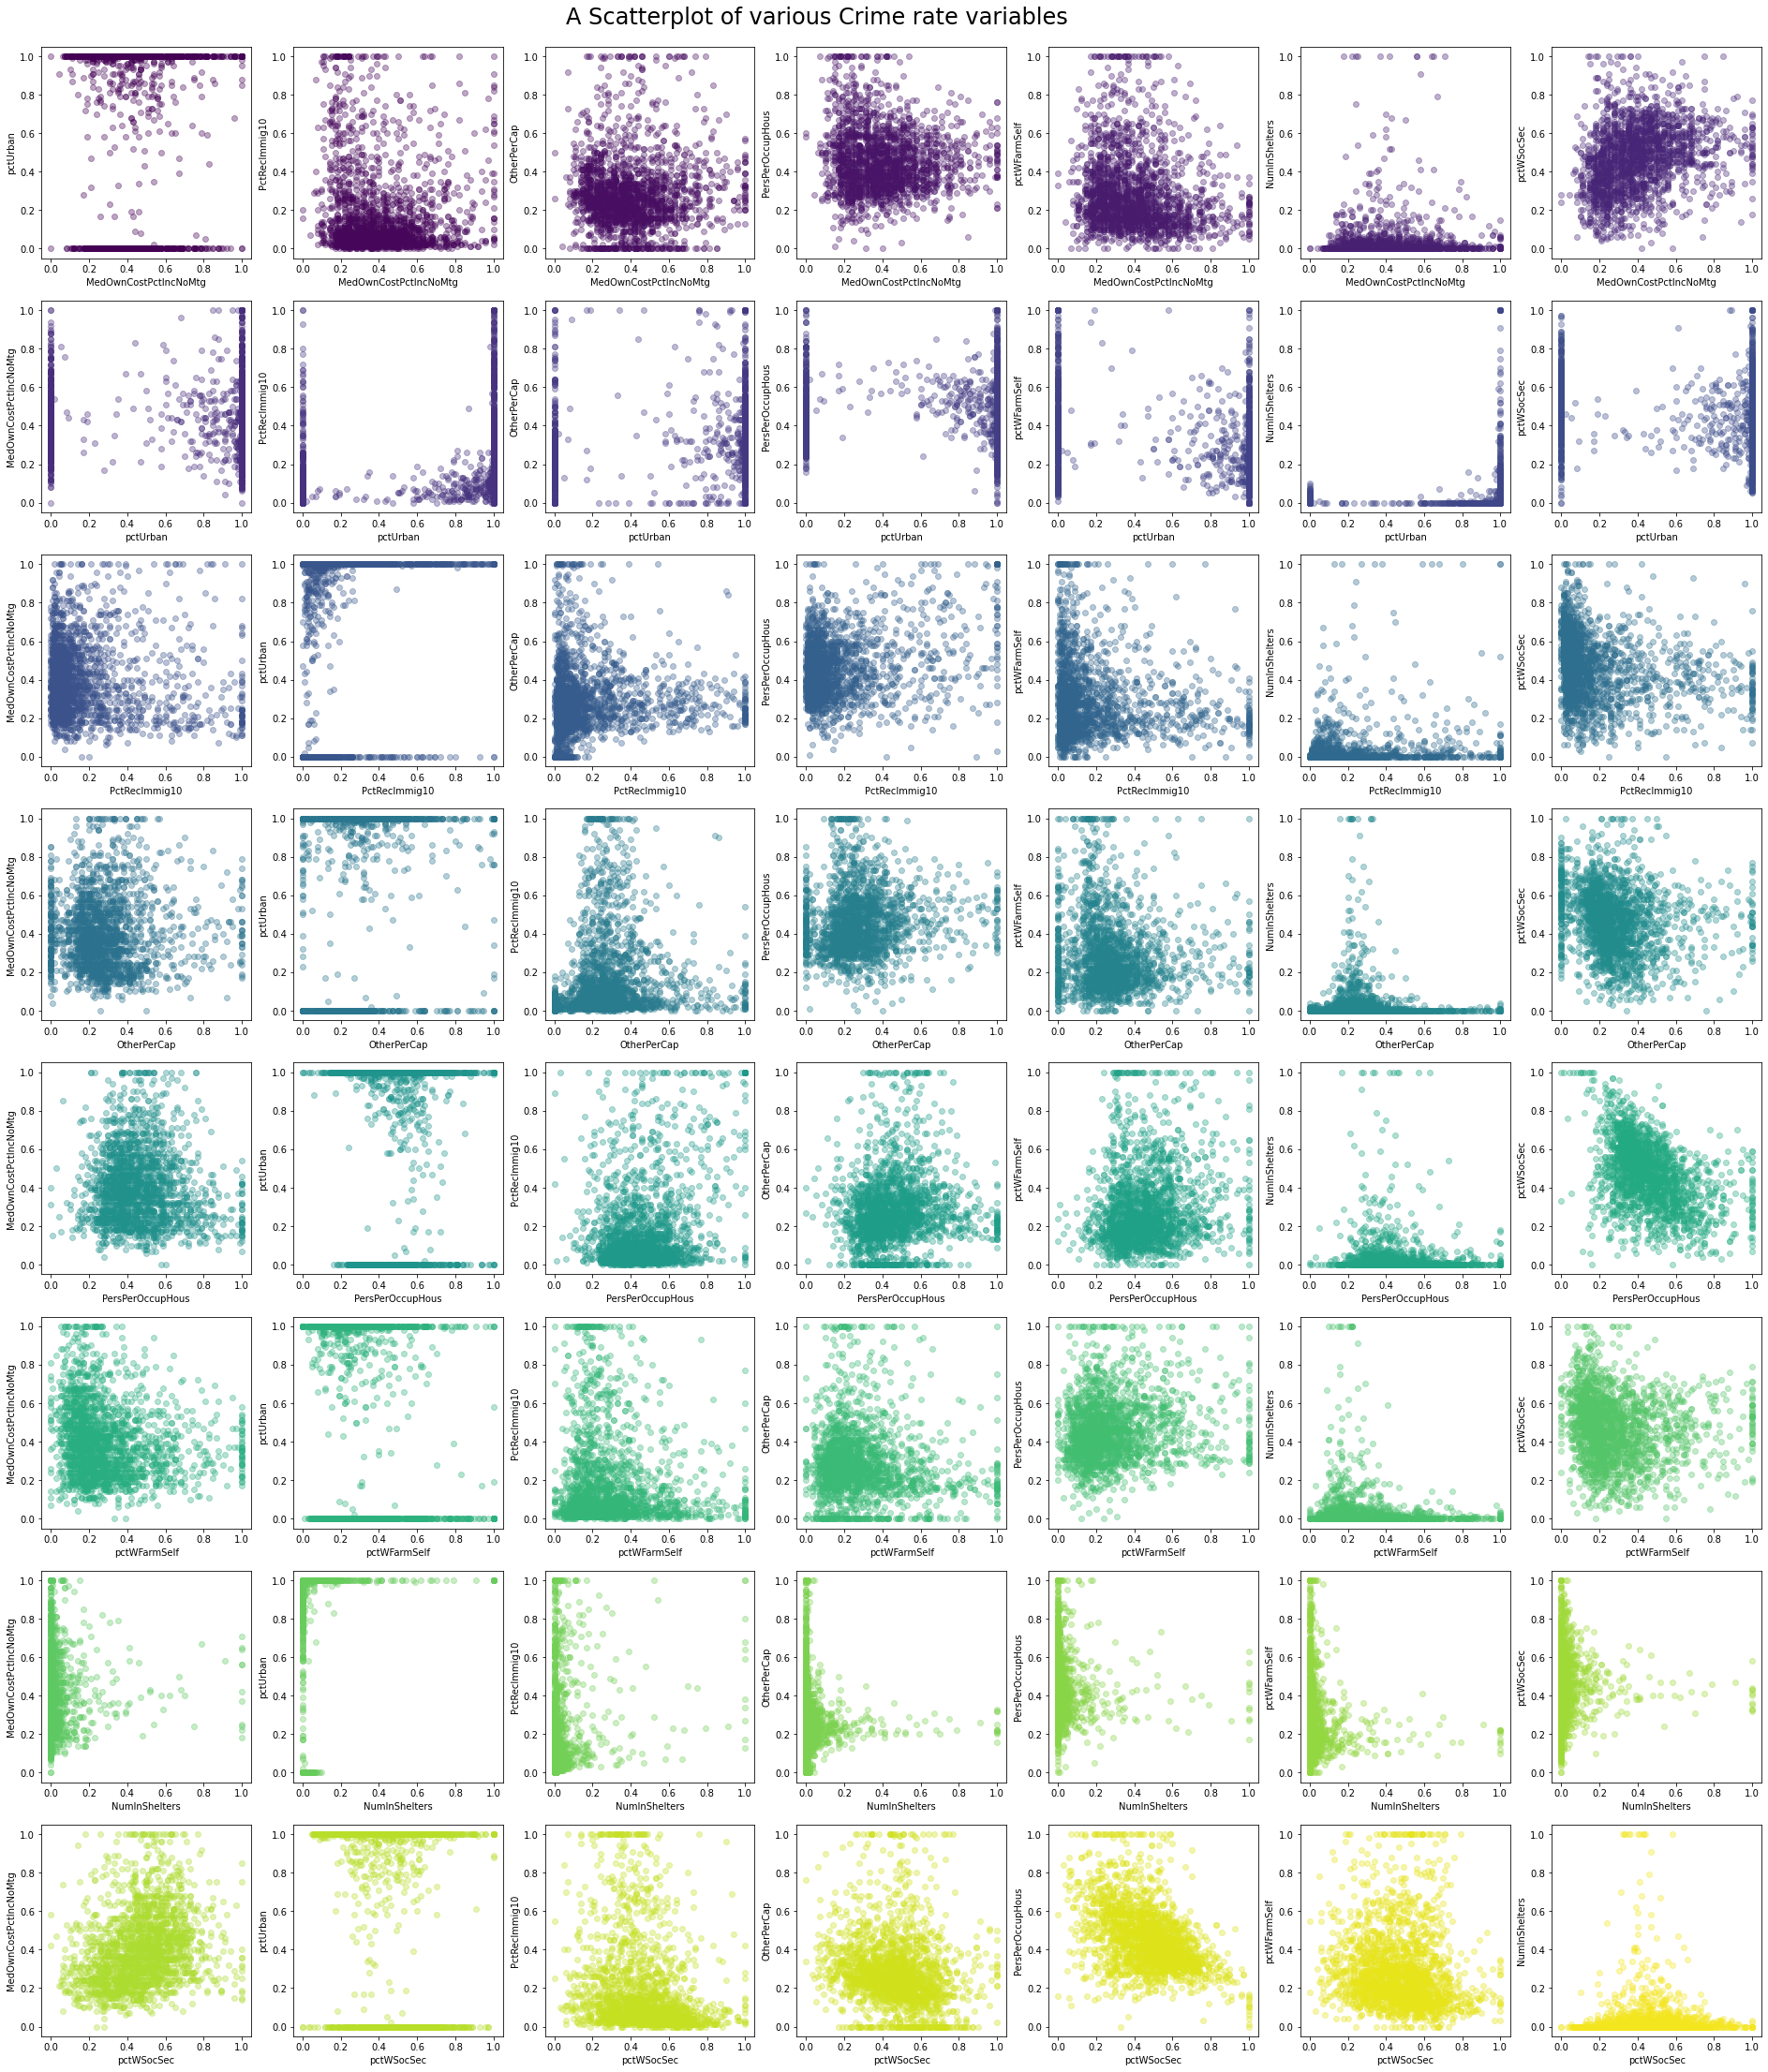

In [17]:
import random
from pandas.api.types import is_numeric_dtype
import matplotlib.cm as cm

#No of random cols u want
nocol = 8

#Get all columns
cols = comm_data.columns
numeric_cols = []

#Check if it is numeric 
for col in cols:
    if(is_numeric_dtype(comm_data[col])):
        numeric_cols.append(col)

#Get all the numeric columns- now we can carry out analysis.
comm_num = comm_data.loc[:,numeric_cols]         
comm_num

#Grab random cols
random_cols = list(comm_num.columns[random.sample(range(0, len(comm_num.columns)-1), nocol)])


#Creating different colors for the sample sizes.
cmap = cm.get_cmap('viridis')
graph_c = []
for s in range(0,(nocol-1)*nocol):
    graph_c.append(cmap(s/((nocol-1)*nocol)))
    
#loop and create graphs
graph_no = 1

#for storing calculated stats
cm_stats = []

#For clarity
fig = plt.figure(figsize=(20,20))
for x in random_cols:
    for y in random_cols:
        #since we dont wanna plot the same variable against each other
        if(x!=y):
            sp = plt.subplot( len(random_cols), len(random_cols)-1, graph_no)
            sp.scatter(comm_num[x],comm_num[y], alpha=0.35, facecolors= graph_c[graph_no-1])
            plt.xlabel(x)
            plt.ylabel(y)
            sr = stats.spearmanr(comm_num[x],comm_num[y])
            pr = stats.pearsonr(comm_num[x],comm_num[y])
            row = [x,y,sr[0], sr[1] ,pr[0] , pr[1]]
            cm_stats.append(row)
            graph_no += 1
plt.suptitle("A Scatterplot of various Crime rate variables",x=0.7,y=1.63,fontsize=24 )             
plt.subplots_adjust(right=1.4, top=1.6) 
plt.show()


In [18]:
pd.DataFrame(cm_stats,columns = ["x","y","spearman","spearman p","pearson","pearson p"]).head()


x                 y  spearman    spearman k   pearson  \
0  MedOwnCostPctIncNoMtg          pctUrban -0.084350  1.626226e-04 -0.031217   
1  MedOwnCostPctIncNoMtg     PctRecImmig10 -0.094290  2.473721e-05 -0.080078   
2  MedOwnCostPctIncNoMtg       OtherPerCap -0.028763  1.992007e-01  0.024974   
3  MedOwnCostPctIncNoMtg  PersPerOccupHous -0.050954  2.288292e-02 -0.078182   
4  MedOwnCostPctIncNoMtg      pctWFarmSelf -0.186736  4.191997e-17 -0.155505   

      pearson k  
0  1.634836e-01  
1  3.445041e-04  
2  2.650007e-01  
3  4.753063e-04  
4  2.907722e-12

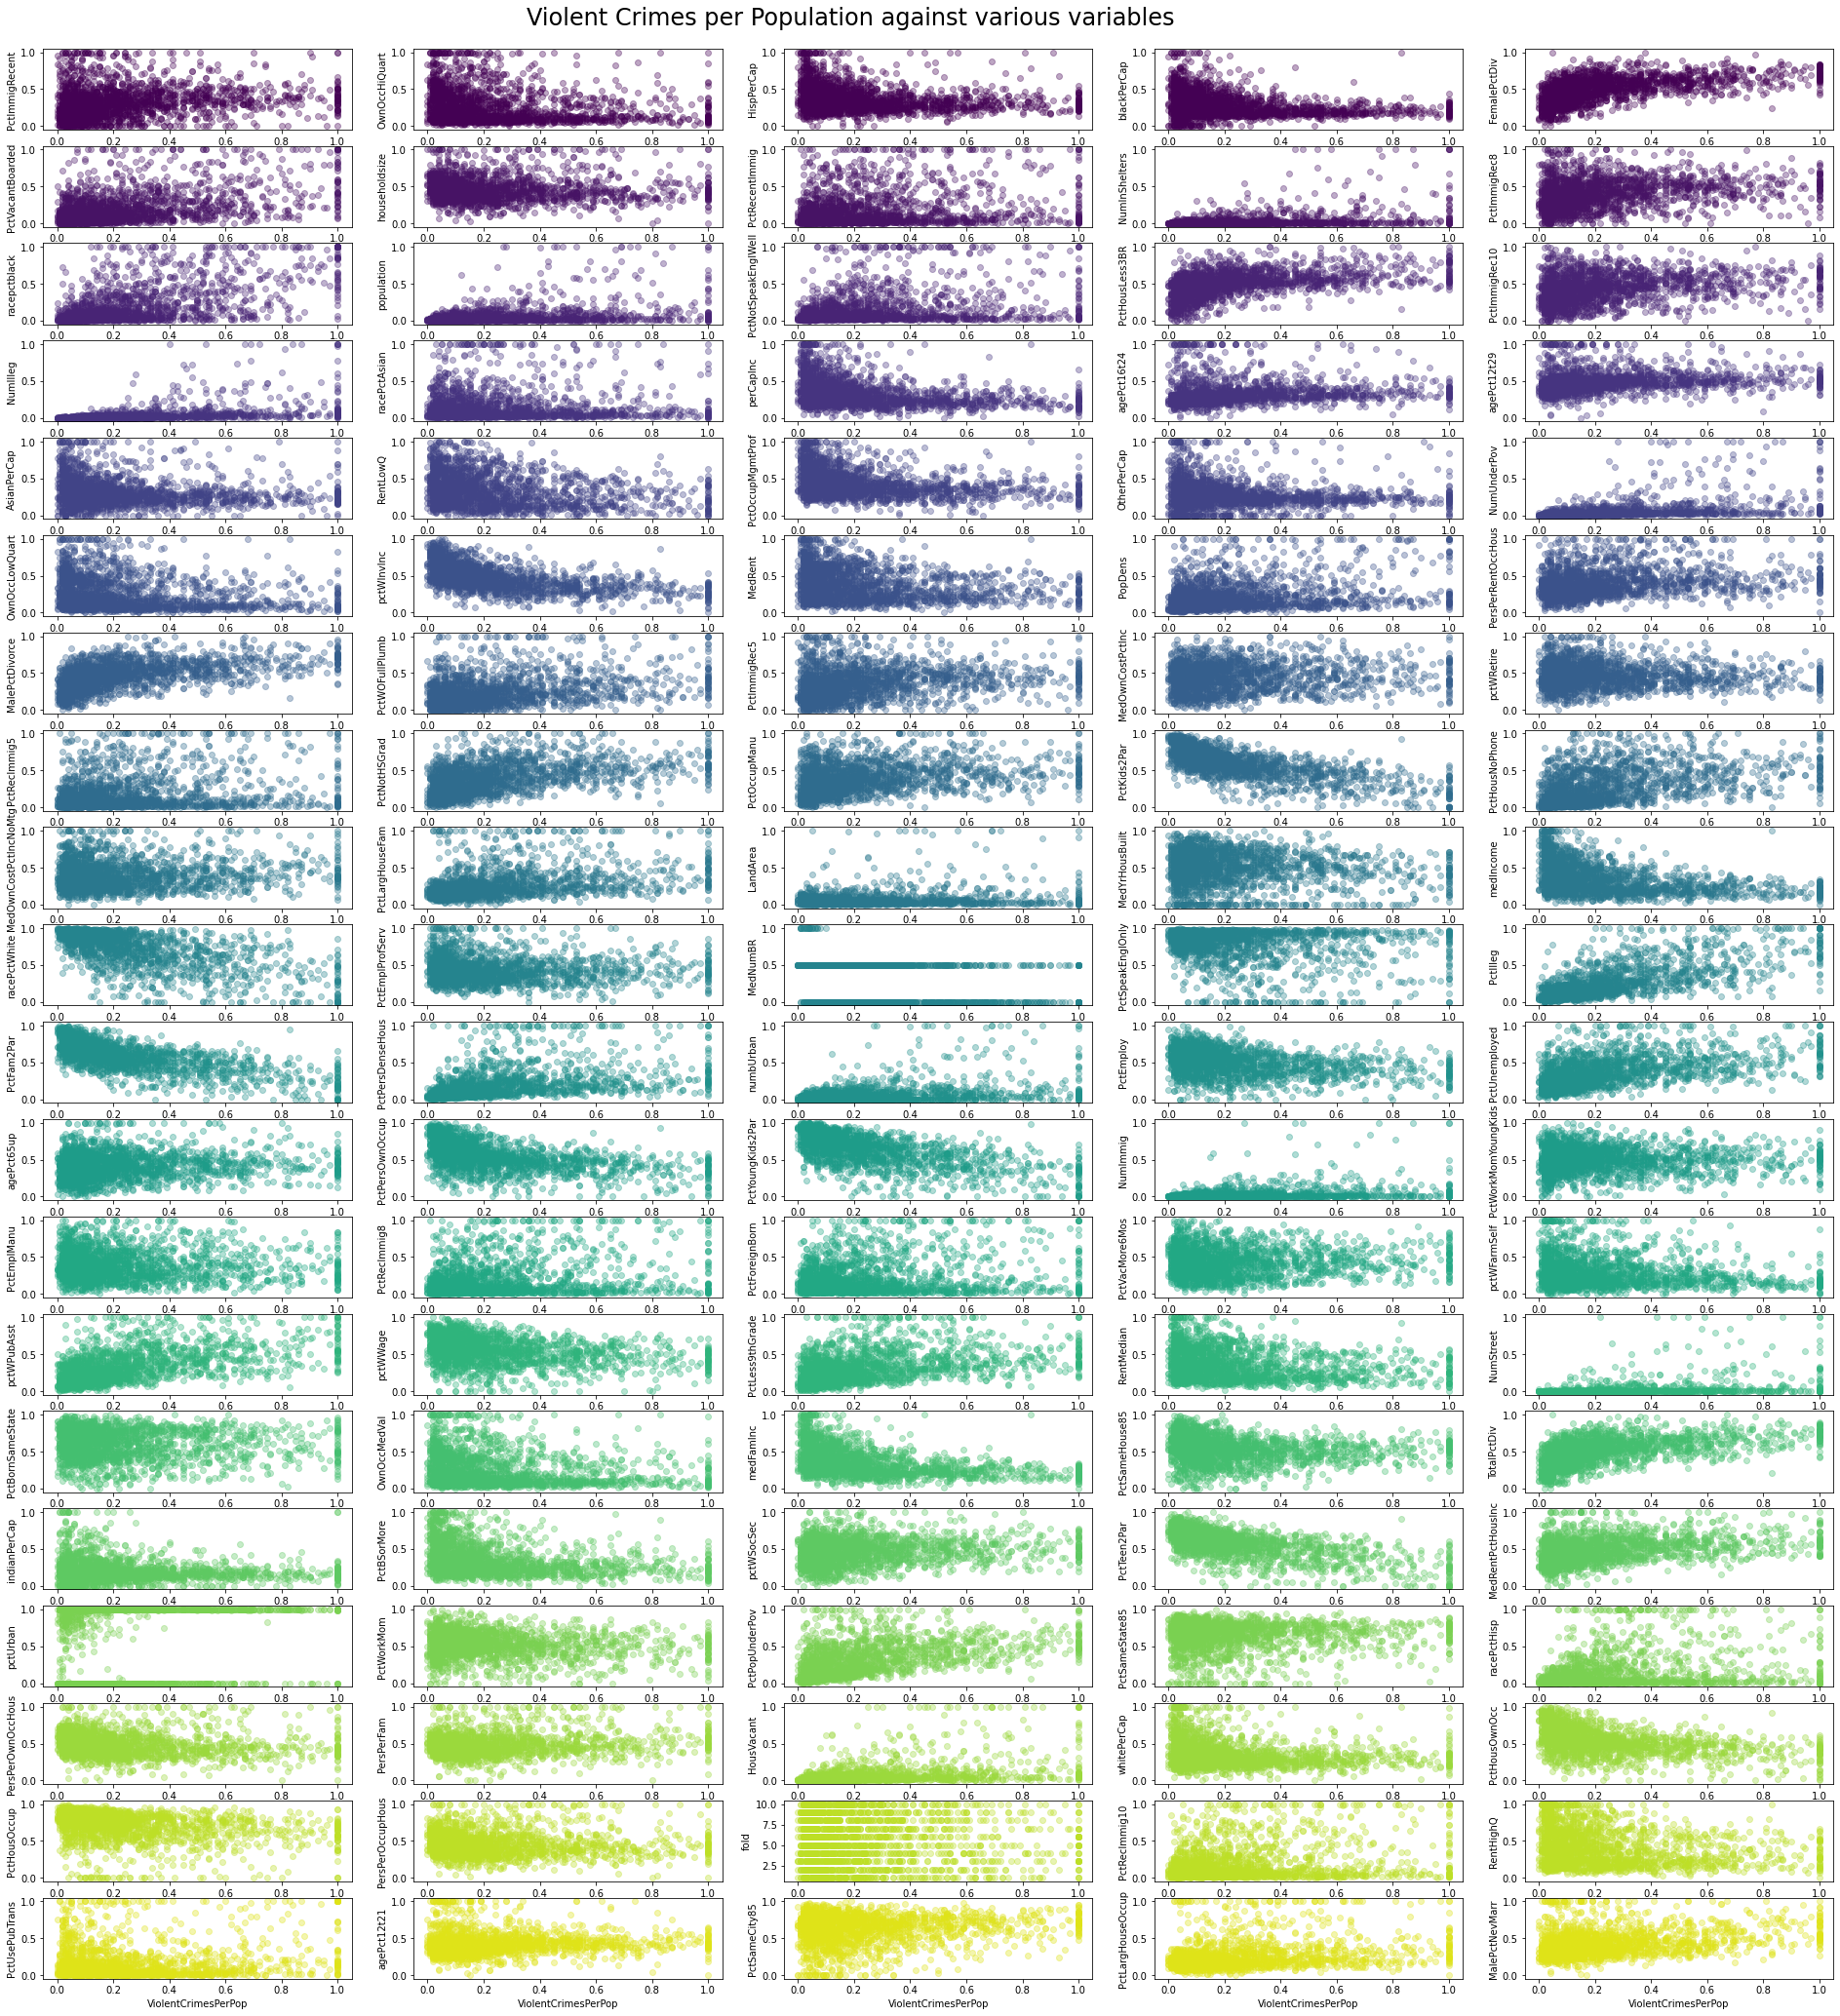

In [20]:
import math

#No of graphs u want
nocol = 100

#Grab random cols
random_cols = list(comm_num.columns[random.sample(range(0, len(comm_num.columns)-1), nocol)])

#Creating different colors for the sample sizes.
graph_c = []
for s in range(0, math.ceil(len(random_cols)/5)):
    graph_c.append(cmap(s/math.ceil(len(random_cols)/5)))
    
#loop and create graphs
graph_no = 1

#for storing calculated stats
crime_stats = []
vcpp = "ViolentCrimesPerPop"

#For clarity
fig = plt.figure(figsize=(20,20))
for y in random_cols:
    sp = plt.subplot( math.ceil(len(random_cols)/5), 5, graph_no)
    sp.scatter(comm_num[vcpp],comm_num[y], alpha=0.35, facecolors= graph_c [math.ceil(graph_no/5)-1] )
    plt.xlabel(vcpp)
    plt.ylabel(y)
    sr = stats.spearmanr(comm_num[vcpp],comm_num[y])
    pr = stats.pearsonr(comm_num[vcpp],comm_num[y])
    row = [vcpp, y, sr[0], sr[1], pr[0], pr[1]]
    crime_stats.append(row)
    graph_no += 1
plt.suptitle("Violent Crimes per Population against various variables",x=0.7,y=1.53,fontsize=24 )    
plt.subplots_adjust(right=1.4, top=1.5) 
plt.show()


In [96]:
#Make the data from an array into a dataframe
vc_statistics = pd.DataFrame(crime_stats,columns = ["x","y","spearman","spearman p","pearson","pearson p"])

#Select the top 11 values by spearman rank
vc_statistics.sort_values("spearman",ascending=False).head(11)


x                 y  spearman     spearman k   pearson  \
49  ViolentCrimesPerPop          PctIlleg  0.742786   0.000000e+00  0.737957   
15  ViolentCrimesPerPop          NumIlleg  0.709618  3.064124e-305  0.471028   
24  ViolentCrimesPerPop       NumUnderPov  0.663549  2.486831e-253  0.447582   
51  ViolentCrimesPerPop  PctPersDenseHous  0.647970  8.235020e-238  0.452901   
4   ViolentCrimesPerPop      FemalePctDiv  0.643777  8.668425e-234  0.556032   
74  ViolentCrimesPerPop       TotalPctDiv  0.633050  8.848081e-224  0.552777   
65  ViolentCrimesPerPop       pctWPubAsst  0.626224  1.293824e-217  0.574665   
82  ViolentCrimesPerPop    PctPopUnderPov  0.619226  1.882652e-211  0.521877   
10  ViolentCrimesPerPop      racepctblack  0.604277  8.527590e-199  0.631264   
30  ViolentCrimesPerPop    MalePctDivorce  0.594556  6.392069e-191  0.525407   
39  ViolentCrimesPerPop    PctHousNoPhone  0.585248  1.254713e-183  0.488243   

        pearson k  
49   0.000000e+00  
15  1.168875e-110  
24   7.943805e-99  
51  1.977787e-101  
4   3.307144e-162  
74  5.965105e-160  
65  1.281756e-175  
82  1.013656e-139  
10  3.757220e-222  
30  6.298428e-142  
39  5.934041e-120

<p>From the correlations, it seems that as the percentage of kids born to never married increases, the violent crimes per population also increases, this has a spearman rank correlation of 0.743 and a pearson of 0.738. The scatter plot for these tao variables is fairly linear hence both correlation methods can be applied with a good degree of success. The p-value for these two variables is 0, which is smaller than 0.05, this indicates that the null hypothesis can be rejected. Another couple of interesting statistics is the male percentage divorce rate, the correlation seems to suggest that areas with higher males who are divorced have higher rates of violent crimes.<p/>

In [97]:
#Select the bottom 11 values by spearman rank
vc_statistics.sort_values("spearman",ascending=True).head(11)

x                 y  spearman     spearman k   pearson  \
38  ViolentCrimesPerPop       PctKids2Par -0.763127   0.000000e+00 -0.738424   
50  ViolentCrimesPerPop        PctFam2Par -0.722948  3.260833e-322 -0.706667   
45  ViolentCrimesPerPop      racePctWhite -0.697328  2.011768e-290 -0.684770   
57  ViolentCrimesPerPop  PctYoungKids2Par -0.685663  4.852315e-277 -0.666059   
78  ViolentCrimesPerPop       PctTeen2Par -0.662821  1.387431e-252 -0.661582   
26  ViolentCrimesPerPop        pctWInvInc -0.658113  8.254017e-248 -0.576324   
56  ViolentCrimesPerPop   PctPersOwnOccup -0.596610  1.459542e-192 -0.525491   
89  ViolentCrimesPerPop     PctHousOwnOcc -0.527867  1.763664e-143 -0.470683   
72  ViolentCrimesPerPop         medFamInc -0.513162  2.198249e-134 -0.439108   
44  ViolentCrimesPerPop         medIncome -0.482170  1.297885e-116 -0.424221   
17  ViolentCrimesPerPop         perCapInc -0.422790   2.766288e-87 -0.352085   

        pearson k  
38   0.000000e+00  
50  1.299903e-301  
45  4.835180e-276  
57  6.415687e-256  
78  2.553127e-251  
26  7.447956e-177  
56  5.578318e-142  
89  1.773947e-110  
72   8.987288e-95  
44   6.334425e-88  
17   2.858269e-59

<p>Now looking at the negative correlations, the two that stand out and are interlinked is the relationship of violent crimes per population with percentage of kids with two parents and percentage of families with two parents. These have a strong negative correlation, stating that areas with a high percentage of two parent households would have fewer violent crimes. This is also the case with percentages of teenagers with two parents and young kids but the strength of the correlation is slightly weaker.<p/>

<h1>Significance Testing</h1>

In [79]:
#Kaggle dataset on heart disease.
heart = pd.read_csv("Data/heart.csv")
print(heart.head())
col_desc = np.reshape(np.array(heart.columns),(len(heart.columns),1))

#Column descriptions from the kaggle dataset
desc = np.array(["age of patient","sex of patient","chest pain type (4 values)","resting blood pressure","serum cholestoral in mg/dl",
"fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)",
"maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest",
"the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy",
"thal: 3 = normal; 6 = fixed defect; 7 = reversable defect","does not have heart disease"])
desc = desc.reshape(len(desc),1)

#Creating the columns and their descriptions into a separate df
heart_desc = pd.DataFrame(np.append(col_desc,desc,axis=1),columns=["col","desc"])
heart_desc

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


col                                               desc
0        age                                     age of patient
1        sex                                     sex of patient
2         cp                         chest pain type (4 values)
3   trestbps                             resting blood pressure
4       chol                         serum cholestoral in mg/dl
5        fbs                    fasting blood sugar > 120 mg/dl
6    restecg  resting electrocardiographic results (values 0...
7    thalach                        maximum heart rate achieved
8      exang                            exercise induced angina
9    oldpeak  oldpeak = ST depression induced by exercise re...
10     slope          the slope of the peak exercise ST segment
11        ca  number of major vessels (0-3) colored by flour...
12      thal  thal: 3 = normal; 6 = fixed defect; 7 = revers...
13    target                        does not have heart disease

In [92]:
#Create numerical columns for gender and has target column for clarity
heart["hasHeartDisease"] = heart["target"].apply(lambda row: True if row== 0 else False)
heart["gender"] = heart["sex"].apply(lambda row: "Male" if row == 1 else "Female")

In [95]:
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  hasHeartDisease  gender  
0   0     1       1            False    Male  
1   0     2       1            False    Male  
2   0     2       1            False  Female  
3   0     2       1            False    Male  
4   0     2       1            False  Female

In [105]:
pd.set_option('display.max_columns', 500)
heart.groupby(["gender","hasHeartDisease"]).describe()


age                                                  \
                        count       mean        std   min    25%   50%    75%   
gender hasHeartDisease                                                          
Female False             72.0  54.555556  10.265337  34.0  46.00  54.0  63.25   
       True              24.0  59.041667   4.964913  43.0  56.75  60.5  62.00   
Male   False             93.0  50.903226   8.682897  29.0  44.00  52.0  57.00   
       True             114.0  56.087719   8.385155  35.0  51.00  57.5  61.00   

                                sex                                        cp  \
                         max  count mean  std  min  25%  50%  75%  max  count   
gender hasHeartDisease                                                          
Female False            76.0   72.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   72.0   
       True             66.0   24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   24.0   
Male   False            70.0   93.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   93.0   
       True             77.0  114.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  114.0   

                                                                     trestbps  \
                            mean       std  min   25%  50%  75%  max    count   
gender hasHeartDisease                                                          
Female False            1.333333  0.919277  0.0  0.75  2.0  2.0  3.0     72.0   
       True             0.166667  0.481543  0.0  0.00  0.0  0.0  2.0     24.0   
Male   False            1.408602  0.980645  0.0  1.00  2.0  2.0  3.0     93.0   
       True             0.543860  0.960645  0.0  0.00  0.0  1.0  3.0    114.0   

                                                                           \
                              mean        std    min    25%    50%    75%   
gender hasHeartDisease                                                      
Female False            128.736111  16.536765   94.0  119.5  130.0  140.0   
       True             146.125000  21.436078  108.0  130.0  140.0  152.5   
Male   False            129.741935  15.955715   94.0  120.0  130.0  140.0   
       True             131.929825  17.217361  100.0  120.0  130.0  140.0   

                                chol                                        \
                          max  count        mean        std    min     25%   
gender hasHeartDisease                                                       
Female False            180.0   72.0  256.750000  66.216195  141.0  210.75   
       True             200.0   24.0  274.958333  60.863696  164.0  234.00   
Male   False            178.0   93.0  230.989247  37.893011  126.0  205.00   
       True             192.0  114.0  246.061404  45.439113  131.0  212.00   

                                               fbs                           \
                          50%    75%    max  count      mean       std  min   
gender hasHeartDisease                                                        
Female False            249.0  289.5  564.0   72.0  0.083333  0.278325  0.0   
       True             265.5  310.0  409.0   24.0  0.250000  0.442326  0.0   
Male   False            228.0  250.0  325.0   93.0  0.182796  0.388594  0.0   
       True             247.5  282.0  353.0  114.0  0.140351  0.348884  0.0   

                                            restecg                           \
                        25%  50%   75%  max   count      mean       std  min   
gender hasHeartDisease                                                         
Female False            0.0  0.0  0.00  1.0    72.0  0.583333  0.524069  0.0   
       True             0.0  0.0  0.25  1.0    24.0  0.541667  0.658005  0.0   
Male   False            0.0  0.0  0.00  1.0    93.0  0.602151  0.492107  0.0   
       True             0.0  0.0  0.00  1.0   114.0  0.429825  0.514726  0.0   

                                           thalach                         \
                        25%  50%  75%  max 

In [106]:
pd.reset_option("display.max_columns")
